In [1]:
%matplotlib inline

In [2]:
import pickle as pkl
import pandas as pd
from datetime import  datetime, timedelta
from copy import copy

from core import  do_simulation
from helpers import Params, plot_total, T, data2df, enhance_total, save_to_json, save_bundle
from const import  STATE

In [3]:
p0_time = pkl.load(open('output/p0_time.pkl', 'rb'))
lockdown_time = T('23/01/2020')

In [4]:
p0_time

datetime.datetime(2019, 11, 29, 0, 0)

In [5]:
bed_info_raw = [
    (p0_time, 3000), # 3000),
    (T('25/01/2020'), 1000), # 4000),    
    (T('31/01/2020'), 6000), # 10000),
    (T('04/02/2020'), 1000), #  11000),
    (T('07/02/2020'), 2000), # 13000)
    (T('11/02/2020'), 6000),  # 19000
    (T('17/02/2020'), 11000),  # 28000
    (T('21/02/2020'), 11000),  # 39000
]
pkl.dump(bed_info_raw, open('data/bed_info_raw.pkl', 'wb'))
# number of new beds at  some days
bed_info = [((d-p0_time).days, n) for d, n in bed_info_raw]
pkl.dump(bed_info, open('data/bed_info.pkl', 'wb'))
print(bed_info)

[(0, 3000), (57, 1000), (63, 6000), (67, 1000), (70, 2000), (74, 6000), (80, 11000), (84, 11000)]


In [6]:
params_before = pkl.load(
    open('output/params_before_lockdown.pkl', 'rb')
)

params_after = pkl.load(
    open('output/params_after_lockdown.pkl', 'rb')
)

In [7]:
days_before_ld  = (lockdown_time -  p0_time).days
days_before_ld

55

In [8]:
total_days = 360

In [9]:
days_before_ld

55

In [10]:
offset = 14
n_offsets = 10
days_offsets = list(range(offset, offset*n_offsets+1, offset))
fine_grained_alpha = [(0, params_before.alpha), (days_before_ld, params_after.alpha)]
fine_grained_alpha += [
    (days_before_ld + i, params_after.alpha) for i in days_offsets
]
fine_grained_beta = [(0, params_before.beta), (days_before_ld, params_after.beta)]
fine_grained_beta += [
    (days_before_ld + i, params_after.beta) for i in days_offsets
]


In [11]:
params = Params(
    total_population=params_before.total_population,
    initial_num_E=params_before.initial_num_E,
    initial_num_I=params_before.initial_num_I,
    initial_num_M=params_before.initial_num_M,  
    mu_ei=params_after.mu_ei,
    mu_mo=params_after.mu_mo,
    k_days=params_after.k_days,
    x0_pt=params_after.x0_pt,
    alpha=fine_grained_alpha,
    beta=fine_grained_beta,
    stages=[days_before_ld] + [(days_before_ld + i) for i in range(offset, offset*n_offsets+1, offset)]
)

total, delta, increase, trans_data, stats = do_simulation(total_days, bed_info, params, p0_time=p0_time, verbose=0)

In [12]:
stats

{'R0_by_stage': {0: (5.121404593397314, 3.1765689512236026, 2.729578619522789),
  1: (5.812251961952192, 4.647113227364332, 1.9752568949722107),
  2: (6.0543687047989, 5.6154952902092745, 2.042111302319967),
  3: (6.159777496032194, 1.6224300655891992, 1.9366048822762427),
  4: (6.191094588417191, 1.0488580932297462, 1.9236573444849379),
  5: (6.193059132673215, 1.0302472924316695, 1.923374677312768),
  6: (6.194056760737192, 1.0225464274146328, 1.923284705785702),
  7: (6.194647514745376, 1.0187212581204332, 1.9232539387643057),
  8: (6.195007962246269, 1.0166454978404902, 1.9232430741865452),
  9: (6.195231095115583, 1.015454817229307, 1.9232392374864495),
  10: (6.1953702830620045, 1.0147475445325138, 1.9232379305478873),
  11: (6.19941918430591, 1.014059930983596, 1.9238094732883468)},
 'end_time': None,
 'peak_time': (72, '09/02/20'),
 'when_dO_gt_dI': (73, '10/02/20'),
 'when_dO_gt_dE': (73, '10/02/20'),
 'turning_time_real': (79, '16/02/20'),
 'turning_time_theory': (84, '21/02/

In [13]:
params

total_population: 9000000
initial_num_E: 1
initial_num_I: 0
initial_num_M: 0

alpha: [(0, 3.1998106751467885e-08), (55, 1.5999999999999998e-08), (69, 1.5999999999999998e-08), (83, 1.5999999999999998e-08), (97, 1.5999999999999998e-08), (111, 1.5999999999999998e-08), (125, 1.5999999999999998e-08), (139, 1.5999999999999998e-08), (153, 1.5999999999999998e-08), (167, 1.5999999999999998e-08), (181, 1.5999999999999998e-08), (195, 1.5999999999999998e-08)]
beta:  [(0, 3.5997870095401374e-09), (55, 1.8e-09), (69, 1.8e-09), (83, 1.8e-09), (97, 1.8e-09), (111, 1.8e-09), (125, 1.8e-09), (139, 1.8e-09), (153, 1.8e-09), (167, 1.8e-09), (181, 1.8e-09), (195, 1.8e-09)]

mu_ei: 6
mu_mo: 10

x0_pt: 12000
k_pt:  0.00014931328910233792
mean_IM: 7

k_days: 14
        

In [14]:
stats

{'R0_by_stage': {0: (5.121404593397314, 3.1765689512236026, 2.729578619522789),
  1: (5.812251961952192, 4.647113227364332, 1.9752568949722107),
  2: (6.0543687047989, 5.6154952902092745, 2.042111302319967),
  3: (6.159777496032194, 1.6224300655891992, 1.9366048822762427),
  4: (6.191094588417191, 1.0488580932297462, 1.9236573444849379),
  5: (6.193059132673215, 1.0302472924316695, 1.923374677312768),
  6: (6.194056760737192, 1.0225464274146328, 1.923284705785702),
  7: (6.194647514745376, 1.0187212581204332, 1.9232539387643057),
  8: (6.195007962246269, 1.0166454978404902, 1.9232430741865452),
  9: (6.195231095115583, 1.015454817229307, 1.9232392374864495),
  10: (6.1953702830620045, 1.0147475445325138, 1.9232379305478873),
  11: (6.19941918430591, 1.014059930983596, 1.9238094732883468)},
 'end_time': None,
 'peak_time': (72, '09/02/20'),
 'when_dO_gt_dI': (73, '10/02/20'),
 'when_dO_gt_dE': (73, '10/02/20'),
 'turning_time_real': (79, '16/02/20'),
 'turning_time_theory': (84, '21/02/

In [15]:
p0_time + timedelta(days=total_days)

datetime.datetime(2020, 11, 23, 0, 0)

/home/cloud-user/code/covid-19/helpers.py:287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['index'] = df.index
/home/cloud-user/code/covid-19/helpers.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['value'] = subdf[state].copy()
/home/cloud-user/code/covid-19/helpers.py:290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

['29/11/19' '09/02/20' '21/04/20' '02/07/20' '12/09/20' '23/11/20']


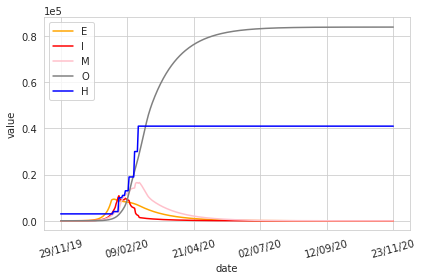

In [16]:
from helpers import plot_total
fig, ax = plot_total(total, p0_time, total_days)
fig.savefig('figs/start2end.pdf')

In [17]:
save_bundle([total, delta, increase, trans_data], p0_time, total_days, 'output/tbl/start2end')

In [18]:
path = 'output/tbl/start2end/stats.txt'
save_to_json(stats, path)